## 제출해야할 것
이번 워크시트를 마치고 제출해야하는 것은 두 가지 입니다.
1. 완성된 knn() 함수 - `2.3.` 항목에서 knn() 함수를 작성하게 됩니다. 스스로 완성한 knn() 함수를 자유 형식의 리포트로 Google Classroom(Code: q6ixy3e https://classroom.google.com/ )에 제출해주세요. 

2. 정답이 공개되지 않은 데이터에 대한 예측 결과 - 마지막 `2.6 Another Application` 항목에서 여러분은 label이 되지 않은 데이터셋을 받게 됩니다. 해당 항목에서 제시된 코드를 변형하여 주어진 데이터셋에 적용한 뒤 (워크시트 마지막에 등장하는 `classifyHandwrittenDigit()` 함수를 수정해야 합니다), 예측된 결과를 .csv, .xlsx, .txt 중 한 가지 형식으로 첨부하여 Google Classroom에 제출해주세요.

* Note: 제출에 앞서 2.6. 항목에서 제시된 코드를 충분히 변형/반복실행 해가며 결과를 knn 수행 결과를 향상시켜 보세요. `k`값을 바꿔가며 알고리듬의 작동 결과를 다르게 할 수 있을 것입니다. knn() distance metric을 변경해보는 것도 고려해볼만한 방법입니다.
* Google Classroom 제출 방법: 웹브라우저에서 Google Classroom(Code: q6ixy3e https://classroom.google.com/ )을 열고 "***Assignment #1 (Lab1 Results)***
"라고 이름 붙여진 게시물을 통해 제출해주세요.

#2. *k*-Nearest Neighbors
두번째 실습이자, 첫번째 ML실습 세션에서는 k-Nearest Neighbors라는 분류(classification) 알고리듬을 다뤄봅니다.

모든 작업을 시작하기 전에 다음을 실행시킵니다. 라이브러리를 불러오는 import 구문입니다. 먼저 numpy라는 이름의 라이브러리는 행렬(matrix)이나 다차원 배열(multi-dimensional array)을 쉽게 처리 할 수 있도록 지원합니다. numpy는 np라는 짧은 별칭으로 많이 사용됩니다 (as를 사용하여 별칭을 지정할 수 있습니다). operator는 일반적인 연산자들을 함수 형태로 사용할 수 있도록 지원합니다. 세번째 matplotlib은 line plot, scatter plot, histogram 등 다양한 차트들을 그릴 수 있는 기능을 제공합니다. plt라는 별칭으로 자주 사용됩니다.

In [ ]:
import numpy as np
import operator
import matplotlib.pyplot as plt

다음으로 Google Drive를 마운트하여 데이터 파일을 엑세스 할 수 있도록 준비합니다. k-NN 분류 알고리듬을 실습해보기 위하여 다음의 파일을 준비합니다.

* datingTestSet.txt
* digits.zip

실습 중 사용되는 모든 실습 코드는 각 개인의 구글 드라이브 내 `datasets/MLPracticum/` 밑에 데이터 파일이 존재한다고 가정하고 작성되었습니다 (디렉토리 이름은 자유롭게 변경해도 괜찮습니다). 밑의 링크를 열어 데이터 파일을 개인의 구글 드라이브에 복사하세요

* 데이터 파일 링크: https://drive.google.com/drive/folders/14CtOIO0nIrpq-caNO50R-gu3ldjsnr4Z?usp=sharing

파일이 복사되었으면 다음 두 줄의 코드를 실행시키고, 나타나는 링크를 통해 각자 구글 어카운트로 로그인 합니다. 화면에 나타나는 밑의 blank에 authorization code를 입력하면 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.1. Load a data file
Google Drive를 마운트하였으면, 다음의 함수를 실행하여 파일을 읽고, 데이터를 불러들일 수 있습니다. 


In [ ]:
def file2matrix(filename):
  file = open(filename)
  n = len(file.readlines())
  return_matrix = np.zeros((n, 3))
  class_labels = []
  file = open(filename)
  index = 0
  for line in file.readlines():
    line = line.strip()
    tokens = line.split('\t')
    return_matrix[index, :] = tokens[0:3]
    class_labels.append(tokens[-1])
    index += 1
    
  return return_matrix, class_labels
  

이제 다음 두 줄의 코드를 실행시켜보겠습니다. 이때 `file2matrix()`의 argument는 여러분의 Google Drive 상에서 `datingTestSet.txt` 파일의 위치가 되도록해야 합니다.



In [ ]:
X, y = file2matrix('/content/drive/MyDrive/0_한동생활/2020-2.5 겨울방학/0_ML_Camp_TA/9_data/datingTestSet.txt')

print(y)
print(X)

['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike', 'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses', 'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike', 'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike', 'largeDoses', 'didntLike', 'largeDoses', 'didntLike', 'smallDoses', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses', 'largeDoses', 'didntLike', 'smallDoses', 'largeDoses', 'largeDoses', 'largeDoses', 'didntLike', 'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'smallDoses', 'didntLike', 'largeDoses', 'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses', 'largeDoses', 'didntLike', 'smallDoses', 'didntLike', 'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses', 'sma

`datingTestSet.txt`는 한 데이팅 사이트 사용자가 1,000 명의 다른 사용자 프로파일을 상대로 자신의 기호를 표시해둔 데이터 중 일부의 내용을 담고 있습니다. 

기호를 나타내는 y(label)를 통해, 다음과 같은 항목들을 볼 수 있습니다.
* didn't like는 사용자가 상대방이 전혀 마음에 들지 않았을 때
* small doses는 사용자가 상대방을 조금 마음에 들어했을 때
* large doses는 사용자가 상대방을 많이 마음에 들어했을 때
에 해당합니다.

사용자의 프로파일(X; input features) 측에는 다음의 3가지 변수가 포함되어 있습니다.
* 첫 번째 컬럼: 연간 항공 이용량 (마일리지)
* 두 번째 컬럼: 연간 게임에 사용한 시간 (%)
* 세 번째 컬럼: 연간 아이스크림 소비량 (L)

### 2.2. Data Normalization
k-means 클러스터링 알고리듬을 다룰 때와 마찬가지로, k-NN 알고리듬에 데이터를 제공하기 앞서 반드시 normalization (정규화) 과정을 거쳐야 합니다. 이를 위하여 앞서 `apply_normalizer()`, `normalize_minmax()`, `normalize_meanstd()` 함수를 다시 사용합니다.


In [ ]:
def apply_normalizer(dataset, offset, divisor):
  dataset_normalized = np.zeros(dataset.shape)
  N = dataset.shape[0]
  dataset_normalized = dataset - np.tile(offset, (N,1))
  dataset_normalized = dataset_normalized / np.tile(divisor, (N,1))
  
  return dataset_normalized


def normalize_minmax(dataset):
  minval = dataset.min(0)
  maxval = dataset.max(0)
  
  dataset_normalized = apply_normalizer(dataset, minval, maxval-minval)
    
    # ** You do NOT need to type in this comment block **
    # What is happening when you call apply_normalizer():
    #   dataset_normalized = np.zeros(dataset.shape)
    #   N = dataset.shape[0]
    #   dataset_normalized = dataset - np.tile(minval, (N,1))
    #   dataset_normalized = dataset_normalized / np.tile(maxval-minval, (N,1))
  
  return dataset_normalized, minval, maxval-minval


def normalize_meanstd(dataset):
  meanval = dataset.mean(0)
  stdval = dataset.std(0)
    
  dataset_normalized = apply_normalizer(dataset, meanval, stdval)
  
    # ** You do NOT need to type in this comment block **
    # What is happening when you call apply_normalizer():
    #   dataset_normalized = np.zeros(dataset.shape)
    #   N = dataset.shape[0]
    #   dataset_normalized = dataset - np.tile(meanval, (N,1))
    #   dataset_normalized = dataset_normalized / np.tile(stdval, (N,1))

  return dataset_normalized, meanval, stdval

## 2.3. Implement *k*-Nearest Neighbors Algorithm (kNN)

이제 kNN classifier를 구현을 해볼 차례입니다. 강의의 내용과 하단에 제시된 코드를 참고하여, 우리의 첫번째 예측 프로그램을 작성해보겠습니다.

In [ ]:
def knn(x_test, X_train, labels, k):
  
  N_train = X_train.shape[0]

  # 1: X_train의 모든 데이터 포인트 (rows)에 대해 x_test로부터 거리를 측정합니다.
  diff_mat = np.tile(x_test, (N_train, 1)) - X_train
  sq_diff_mat = diff_mat ** 2
  sq_distances = sq_diff_mat.sum(axis=1)
  distances = sq_distances ** 0.5

  # 2: x_test로부터 가장 가까운 k개의 X_train 데이터 포인트를 찾아 "이웃점 집합" I를 구성합니다.
  sorted_dist_indicies = distances.argsort()

  # 3: x_test에 대한 예측을 합니다 -- 집합 I에서 가장 주류인 label을 따라 의사결정을 합니다.
  class_count = {}
  for i in range(k):
    vote = labels[sorted_dist_indicies[i]]
    class_count[vote] = class_count.get(vote, 0) + 1

  sorted_class_count = sorted(class_count.items(), 
                              key=operator.itemgetter(1), reverse=True)

  # 4: result를 리턴합니다.
  result = sorted_class_count[0][0]
  # print(class_count)  # optional screen dump
  return result

**Q: 4번 줄의 np.tile()은 무엇을 하는 함수인가요? 출력물인 diff_mat에는 어떠한 내용이 담겨있을까요?**
Hint: 위에서 지정했듯이 np는 numpy를 나타냅니다. tile 함수는 numpy가 제공하는 라이브러리에 속해있으며 다름 링크를 통해 사용법을 확인할 수 있습니다.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html


Numpy의 개발자들은 tile 함수를 포함한 모든 numpy의 멤버들에 대한 문서를 제공하고 있습니다. 다음 링크를 통해 확인할 수 있습니다.

https://docs.scipy.org/doc/numpy/reference/routines.html

### 2.4. Test the classifier
준비된 데이터에 대한 예측 정확도를 살펴보겠습니다. 20%의 테스트 데이터를 떼어 두었다가 kNN에 적용해보는 방법으로 테스트가 진행됩니다.

In [ ]:
# Reload the dataset
X, y = file2matrix('/content/drive/MyDrive/0_한동생활/2020-2.5 겨울방학/0_ML_Camp_TA/9_data/datingTestSet.txt')

holdout_ratio = .2

N = X.shape[0] # number of instances
N_ts = int(N*holdout_ratio) # number of test instances
N_tr = N - N_ts # number of training instances


# Split the dataset
X_tr = X[0:N_tr,:]
y_tr = y[0:N_tr]

X_ts = X[N_tr:,:]
y_ts = y[N_tr:]

# Uncomment the following lines, if you want to see the data contents
# print(N_tr)
# print(N_ts)

# print(X_tr.shape)
# print(X_ts.shape)

# print(X_tr)
# print(X_ts)
# print(y_tr)
# print(y_ts)


# Normalize the dataset
X_normalized_tr, off, div = normalize_minmax(X_tr)
X_normalized_ts = apply_normalizer(X_ts, off, div)


# Apply the classifier
n_errors = 0
y_pred_ts = []
for i in range(N_ts):
  y_pred_ts.append(knn(X_normalized_ts[i], X_normalized_tr, y_tr, 3))
  if(y_pred_ts[i] != y_ts[i]):
    n_errors += 1
    
print("the accuracy is: %f" % (1 - n_errors/float(N_ts)))
print("the error rate is: %f" % (n_errors/float(N_ts)))


print("\n---- (Y_true, Y_pred) pairs ----")
print(*list(zip(y_ts, y_pred_ts)), sep="\n")

the accuracy is: 0.950000
the error rate is: 0.050000

---- (Y_true, Y_pred) pairs ----
('didntLike', 'didntLike')
('smallDoses', 'smallDoses')
('largeDoses', 'largeDoses')
('smallDoses', 'smallDoses')
('smallDoses', 'smallDoses')
('largeDoses', 'largeDoses')
('didntLike', 'didntLike')
('didntLike', 'didntLike')
('didntLike', 'didntLike')
('didntLike', 'smallDoses')
('largeDoses', 'largeDoses')
('smallDoses', 'smallDoses')
('smallDoses', 'smallDoses')
('didntLike', 'didntLike')
('largeDoses', 'largeDoses')
('didntLike', 'didntLike')
('smallDoses', 'smallDoses')
('largeDoses', 'largeDoses')
('didntLike', 'didntLike')
('largeDoses', 'largeDoses')
('didntLike', 'didntLike')
('largeDoses', 'largeDoses')
('didntLike', 'didntLike')
('didntLike', 'didntLike')
('largeDoses', 'largeDoses')
('smallDoses', 'smallDoses')
('largeDoses', 'largeDoses')
('didntLike', 'didntLike')
('didntLike', 'didntLike')
('largeDoses', 'largeDoses')
('largeDoses', 'largeDoses')
('largeDoses', 'largeDoses')
('largeDo

### 2.5. An Application
최종적으로 불러들인 데이터셋과 kNN을 사용하여, 사용자의 입력 값에 따른 매칭 점수를 예상해보는 프로그램을 만들어 보겠습니다. 프로그램을 수행하면 나타나는 입력 박스에 질문에 해당하는 답을 넣어 테스트를 해보면 실시간으로 예측 결과를 확인할 수 있게 됩니다.

In [ ]:
def classifyPerson():
  resultList = ['not at all','in small doses', 'in large doses']
  
  percentTats = float(input("percentage of time spent playing video games? "))
  ffMiles = float(input("frequent flier miles earned per year? "))
  iceCream = float(input("liters of ice cream consumed per year? "))
  
  X_hist, y_hist = file2matrix('/content/drive/MyDrive/0_한동생활/2020-2.5 겨울방학/0_ML_Camp_TA/9_data/datingTestSet.txt')
  
  X_hist_normalized, off, div = normalize_minmax(X_hist)
  X_test = np.array([ffMiles, percentTats, iceCream])
  classifierResult = knn((X_test - off)/div, X_hist_normalized, y_hist, 3)
  print("You will probably like this person: ", classifierResult)
  
classifyPerson()

percentage of time spent playing video games? 50
frequent flier miles earned per year? 50
liters of ice cream consumed per year? 50
You will probably like this person:  largeDoses


##2.6. Analyze Results
내일 다뤄볼 내용의 미리보기 입니다. matplotlib이라는 라이브러리를 사용하여 데이터의 분포를 '살짝만' 살펴보겠습니다.

먼저 데이터를 다시 불러들입니다.

In [ ]:
X, y = file2matrix('/content/drive/MyDrive/0_한동생활/2020-2.5 겨울방학/0_ML_Camp_TA/9_data/datingTestSet.txt')

y_int = []
for i in range(N):
  if y[i] == 'largeDoses':
    y_int.append(3)
  elif y[i] == 'smallDoses':
    y_int.append(2)
  else:
    y_int.append(1)

처음 시도해보는 visualization code에서는 입력데이터의 2번째와 3번째 컬럼 (인덱스 1, 2번) 을 사용하여 아웃풋 레이블(y values)의 분포를 살펴봅니다.

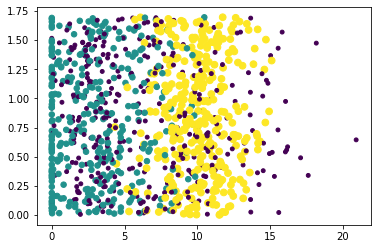

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(X[:,1], X[:,2])
ax.scatter(X[:,1], X[:,2], 15*np.array(y_int), 15*np.array(y_int))
plt.show()

두 번째 visualization code에서는 입력데이터의 1번째와 2번째 컬럼 (인덱스 0, 1번) 을 사용하여 아웃풋 레이블(y values)의 분포를 살펴봅니다.

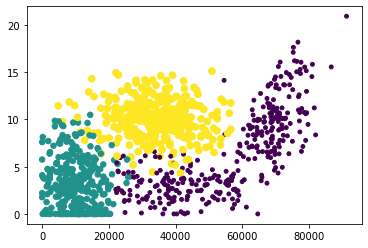

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], 15*np.array(y_int), 15*np.array(y_int))
plt.show()

**Q: 의사결정을 위해 더 좋은 입력 변수(input features)를 고른다면, 1, 2, 3 번째 중에 어떤 것들을 고를까요?**

### 2.7. Another Application

이번에는 새로운 데이터셋을 살펴보겠습니다. 아래의 코드를 수행해보기 전에 `digits.zip` 파일을 받아 압축을 풀고, Google Drive에 올려서 데이터셋을 준비해주세요. 

밑의 예제에서는 'drive/My Drive/datasets/MLPracticum/digits/trainingDigits' 및 'testDigits' 위치에 handwritten digits 데이터셋이 위치해 있다고 가정을 하고 작성되었습니다 (수기로 작성된 0-9 사이의 숫자 데이터셋). 'trainingDigits' 및 'testDigits' 디렉토리에는 텍스트 형태의 바이너리 이미지가 포함되어 있습니다. 예를 들어 'trainingDigits/0_1.txt' 파일에는 다음과 같은 텍스트가 포함되어 있습니다 (**0과 1로 그려진 커다란 0이라는 숫자가 보이나요?**):

```
00000000000111110000000000000000
00000000001111111000000000000000
00000000011111111100000000000000
00000000111111111110000000000000
00000001111111111111000000000000
00000011111110111111100000000000
00000011111100011111110000000000
00000011111100001111110000000000
00000111111100000111111000000000
00000111111100000011111000000000
00000011111100000001111110000000
00000111111100000000111111000000
00000111111000000000011111000000
00000111111000000000011111100000
00000111111000000000011111100000
00000111111000000000001111100000
00000111111000000000001111100000
00000111111000000000001111100000
00000111111000000000001111100000
00000111111000000000001111100000
00000011111000000000001111100000
00000011111100000000011111100000
00000011111100000000111111000000
00000001111110000000111111100000
00000000111110000001111111000000
00000000111110000011111110000000
00000000111111000111111100000000
00000000111111111111111000000000
00000000111111111111110000000000
00000000011111111111100000000000
00000000001111111111000000000000
00000000000111111110000000000000
```



또한, 파일명 중 언더스코어(_) 앞 부분의 숫자는 0-9 사이의 레이블을 나타냅니다. 예를 들어, **0**_1.txt에서 언더스코어 앞의 0은 레이블을 나타냅니다.

여러분의 Notebook에서 코드를 작성하고 수행해보면 텍스트 파일로 표현된 숫자 이미지를 하나씩 읽어들이고, 처리해내는 과정을 관찰 할 수 있을 것입니다.
또한, 코드 수행이 완료되는 시점에 전체적인 정확도와 에러율을 확인할 수 있습니다.

In [ ]:
import os

K = 5

IMG_WIDTH = 32
IMG_HEIGHT = 32

def img2vector(filename):
  vect = np.zeros((1, 1024))
  file = open(filename)
  for i in range(IMG_HEIGHT):
    line = file.readline()
    for j in range(IMG_WIDTH):
      vect[0, 32*i+j] = int(line[j])
  return vect

def classifyHandwrittenDigit():
  dirname_str = '/content/drive/MyDrive/0_한동생활/2020-2.5 겨울방학/0_ML_Camp_TA/9_data/digits/trainingDigits'
  
  filelist_tr = os.listdir(dirname_str)
  N_tr = len(filelist_tr)
  X_tr = np.zeros((N_tr, 1024))
  y_tr = []
  
  # training data
  for i in range(N_tr):
    if i%100 == 0:
      print('(train) Busy...', i, '/', N_tr)
    
    filename_str = filelist_tr[i].split('.')[0]
    label = int(filename_str.split('_')[0])
    y_tr.append(label)
    X_tr[i,:] = img2vector('%s/%s' % (dirname_str, filelist_tr[i]))
    
  n_errors = 0
  
  # test data
  dirname_str = '/content/drive/MyDrive/0_한동생활/2020-2.5 겨울방학/0_ML_Camp_TA/9_data/digits/testDigits'
  filelist_ts = os.listdir(dirname_str)
  N_ts = len(filelist_ts)
  for i in range(N_ts):
    if i%100 == 0:
      print('(test) Busy...', i, '/', N_ts)
      
    filename_str = filelist_ts[i].split('.')[0]
    label = int(filename_str.split('_')[0])
    X_ts = img2vector('%s/%s' % (dirname_str, filelist_ts[i]))
    classifierResult = knn(X_ts, X_tr, y_tr, K)
    
    print(type(classifierResult))

    print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, label))
    if (classifierResult != label): n_errors += 1.0
  print("\nthe total number of errors is: %d" % n_errors)
  print("\nthe accuracy is: %f" % (1 - n_errors/float(N_ts)))
  print("\nthe error rate is: %f" % (n_errors/float(N_ts)))
  
classifyHandwrittenDigit()

(train) Busy... 0 / 1934
(train) Busy... 100 / 1934
(train) Busy... 200 / 1934
(train) Busy... 300 / 1934
(train) Busy... 400 / 1934
(train) Busy... 500 / 1934
(train) Busy... 600 / 1934
(train) Busy... 700 / 1934
(train) Busy... 800 / 1934
(train) Busy... 900 / 1934
(train) Busy... 1000 / 1934
(train) Busy... 1100 / 1934
(train) Busy... 1200 / 1934
(train) Busy... 1300 / 1934
(train) Busy... 1400 / 1934
(train) Busy... 1500 / 1934
(train) Busy... 1600 / 1934
(train) Busy... 1700 / 1934
(train) Busy... 1800 / 1934
(train) Busy... 1900 / 1934
(test) Busy... 0 / 840
<class 'int'>
the classifier came back with: 0, the real answer is: 0
<class 'int'>
the classifier came back with: 0, the real answer is: 0
<class 'int'>
the classifier came back with: 0, the real answer is: 0
<class 'int'>
the classifier came back with: 0, the real answer is: 0
<class 'int'>
the classifier came back with: 0, the real answer is: 0
<class 'int'>
the classifier came back with: 0, the real answer is: 0
<class 'i

### References
* Harrington. *Machine Learning in Action*. Manning Publications Co. 2012.

In [2]:
def palindrome(source):
    result = checkP(source)

    if result:
      return result, source 
    else:
      return result, source[::-1]

def checkP(source):
    if len(source) < 2:
      return True

    if source[0]==source[-1]:
      return True and checkP(source[1:-1]) 
    else :
      return False
   
palindrome("apple")

False


(False, 'elppa')

In [3]:
palindrome("radar")

True


(True, 'radar')